# **Welcome to Deep fake maker**

## setup
before we start we need to set some stuff up


*   go to runtime then change runtime type to Gpu
*   first of all enter your google drive account
*   create a folder named **deepfake**


*  then copy all the files from the link below to that folder

---

https://drive.google.com/drive/folders/1AM8Arqf_5iFPbdRlcGkEwQp5sSrMDY3w?usp=sharing


## Image editing
now that we have the files we can start editing our image

*   get your target image  (it is best to be a front face it will make it more accurate)
*   next you need to put the image in the right size which is 256x256

you can use whatever editor you want but you can use this online editor for simplicity

https://www.kapwing.com/studio

resize the image then click export and for reference this is how a the picture should look like
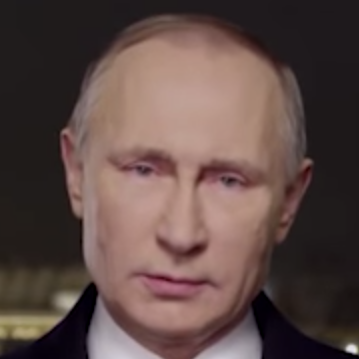

Note that the name of the image should be target.png





after that you will need to have a target image 


get your target image and it is best to be a front face it will make it more accurate

Upload the picture to the deepfake folder in your google drive

## now let's start the fun part
this where we will start running the code
just click the play button on the top left of each cell and wait for it


###setting up the environment 

In [ ]:
!pip install PyYAML==5.3.1
!git clone https://github.com/Al-khattab/first-order-model


In [ ]:
cd first-order-model

/content/first-order-model


### Mount your Google drive folder on Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


this cell will ask you for a key
click the link and log in to your google drive and copy the code from there

### Load driving video and source image

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

source_image = imageio.imread('/content/gdrive/My Drive/deepfake/target.png')
driving_video = imageio.mimread('/content/gdrive/My Drive/deepfake/04.mp4')


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, driving_video).to_html5_video())

### Load the model

In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='/content/gdrive/My Drive/deepfake/vox-cpk.pth.tar')

### Perform image animation

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save resulting video
imageio.mimsave('../faked.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())

## video editing

Now we are almost done 
you can see on the left side a file named **faked.mp4**
download that file
all what we need is to add the sound and increase the speed

the speed should be x3 the video speed so we need to edit that 

you can use any editor you want but the easiest is this online editor

https://www.kapwing.com/
it doesn't have a x3 speed changer but we can still do it as follows

1)upload your video "faked.mp4"
then increase the speed to x2
2)click export and copy the link
3) open the website in a new tab and past the link in it
4) increase the speed of the new video to 1.5
5)click export and copy the link

## last step

https://www.kapwing.com/explore/baka-mitai-dame-da-ne-meme-template

this is a template for the song 
open the link and click upload 
past the link to your video 
then click export 


# enjoy